In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import rcParams
import scipy.stats as stats
from datetime import datetime
import sqlalchemy
%matplotlib inline
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

### Permasalahan pada Dataset
- Ada 3 category product yang unit terjualnya bernilai dibawah 10% dibandingkan dengan category product yang lain
- Ada 3 category product yang keuntungannya dibawah 150000 dibandingkan dengan category product yang lain
- Dataset banyak null value yang hampir melebihi 50% jika dilakukan drop langsung
- Perusahaan ingin meningkatkan penjualan barang dan ingin meningkatkan keuntungan

### Tujuan Exploratory Data Analysis
- Mencari 3 category yang paling sedikit unit terjual dan paling sedikit menghasilkan keuntungan yang nantinya akan dilakukan promosi untuk membuat orang agar lebih banyak membeli barang dan juga agar dapat meningkatkan keuntungan
- Mencari 3 category dan 3 brand yang paling banyak diminati pembeli berdasarkan gender
- Mencari hubungan shpping_rate, gender, category, keuntungan, mencari hubungan shpping_rate, gender, category, rating, agar dapat dilihat apakah rating berpengaruh terhadap fitur-fitur tersebut
- Membuat rekomendasi produk dan brand yang memiliki potensi dapat meningkat dalam hal unit penjualan dan keuntungan penjualannya

In [123]:
# Membuka file .csv
df = pd.read_csv('https://raw.githubusercontent.com/Lecturer-Jcds/Exam-Data-Analytics-Visualization/master/ecommerce.csv')

# Menghilangkan kolom Unnamed
df = df.iloc[:, 1:]

# Mengecek 5 baris teratas
df.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men


In [124]:
# Mengecek 5 baris terbawah
df.tail()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
604,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
605,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
606,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
607,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men
608,Watches,Tissot Dress Watch For Women Analog Stainless ...,1740.0,960.49,20.0,NaN,FREE Shipping,women


#### Ada 6 kolom yang terdapat pada database ecommerce

In [125]:
df.columns

Index(['category', 'product', 'Original_price', 'price', 'perc_of_unit_sold',
       'rating', 'shpping_rate', 'gender'],
      dtype='object')

In [126]:
df.describe()

,Original_price,price,perc_of_unit_sold,rating
count,583.000000,609.000000,522.000000,427.000000
mean,864.498113,339.434039,57.678161,87.807963
std,1803.365527,285.416406,25.434947,11.422350
min,42.000000,21.400000,2.000000,20.000000
25%,273.000000,140.980000,36.250000,82.000000
50%,499.000000,262.490000,60.000000,88.000000
75%,980.000000,444.990000,79.000000,96.000000
max,29970.000000,3220.000000,99.000000,100.000000


In [127]:
# Mengetahui kolom, null dan data type dari setiap feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           609 non-null    object 
 1   product            609 non-null    object 
 2   Original_price     583 non-null    float64
 3   price              609 non-null    float64
 4   perc_of_unit_sold  522 non-null    float64
 5   rating             427 non-null    float64
 6   shpping_rate       567 non-null    object 
 7   gender             581 non-null    object 
dtypes: float64(4), object(4)
memory usage: 38.2+ KB


In [128]:
df.shape

(609, 8)

In [129]:
df.dtypes

category              object
product               object
Original_price       float64
price                float64
perc_of_unit_sold    float64
rating               float64
shpping_rate          object
gender                object
dtype: object

In [130]:
df.index

RangeIndex(start=0, stop=609, step=1)

#### Jumlah Null Value masing-masing Feature

In [131]:
df.isnull().sum()

category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

In [132]:
df.isnull().any()

category             False
product              False
Original_price        True
price                False
perc_of_unit_sold     True
rating                True
shpping_rate          True
gender                True
dtype: bool

In [133]:
# Sebelum di drop
df.describe()

# NULL VALUE
# Original_price: Mean > Median
# perc_of_unit_sold: Mean < Median
# rating: Mean < Median
# gender

,Original_price,price,perc_of_unit_sold,rating
count,583.000000,609.000000,522.000000,427.000000
mean,864.498113,339.434039,57.678161,87.807963
std,1803.365527,285.416406,25.434947,11.422350
min,42.000000,21.400000,2.000000,20.000000
25%,273.000000,140.980000,36.250000,82.000000
50%,499.000000,262.490000,60.000000,88.000000
75%,980.000000,444.990000,79.000000,96.000000
max,29970.000000,3220.000000,99.000000,100.000000


In [134]:
# Setelah di drop
df_temp = df.dropna()
df_temp.describe()

# Original_price: Mean > Median
# price: Mean > Median
# perc_of_unit_sold: Median > Mean
# rating: Mean > Median

,Original_price,price,perc_of_unit_sold,rating
count,351.000000,351.000000,351.000000,351.000000
mean,929.212821,338.657123,62.698006,88.056980
std,1818.035188,274.580470,24.431595,11.019834
min,42.000000,21.400000,2.000000,20.000000
25%,266.000000,125.990000,47.500000,84.000000
50%,560.000000,251.490000,66.000000,90.000000
75%,1026.000000,470.485000,84.000000,96.000000
max,29970.000000,2115.490000,99.000000,100.000000


In [135]:
df.isnull().sum()

category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

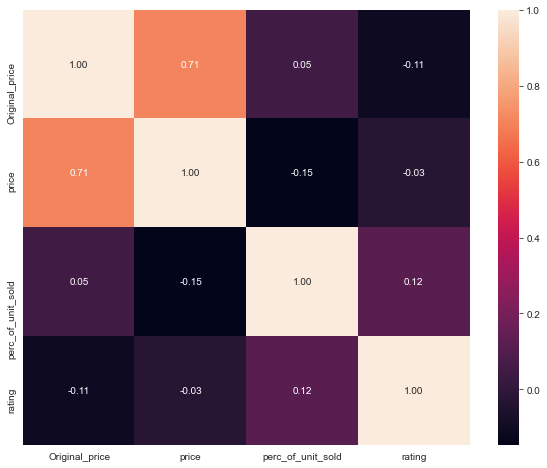

In [136]:
# Cek korelasi jika belum di drop null value
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

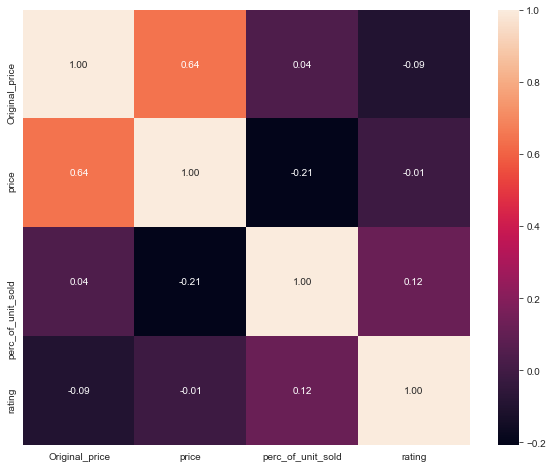

In [137]:
# Cek korelasi setelah di drop null value
plt.figure(figsize=(10, 8))
sns.heatmap(df_temp.corr(), annot=True, fmt=".2f")

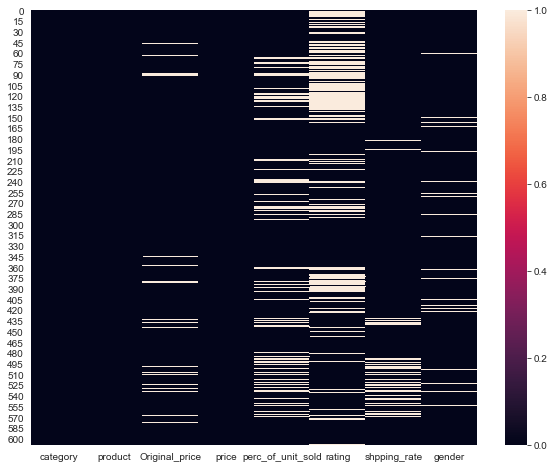

In [138]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull())
plt.show()

In [139]:
total_data_tanpa_drop = df.count()
total_data_tanpa_drop

category             609
product              609
Original_price       583
price                609
perc_of_unit_sold    522
rating               427
shpping_rate         567
gender               581
dtype: int64

In [140]:
total_data_dengan_drop = df.dropna().count()
total_data_dengan_drop

category             351
product              351
Original_price       351
price                351
perc_of_unit_sold    351
rating               351
shpping_rate         351
gender               351
dtype: int64

### Karena setelah di drop datanya menjadi kurang dari setengahnya maka tidak bisa di drop value. Jika di drop, maka akan kehilangan > 50% informasi. Oleh karena itu, untuk mengatasi drop value dilakukan imputasi.

In [154]:
df.isnull().sum()

category               0
product                0
Original_price         0
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

In [144]:
df.describe()

,Original_price,price,perc_of_unit_sold,rating
count,583.000000,609.000000,522.000000,427.000000
mean,864.498113,339.434039,57.678161,87.807963
std,1803.365527,285.416406,25.434947,11.422350
min,42.000000,21.400000,2.000000,20.000000
25%,273.000000,140.980000,36.250000,82.000000
50%,499.000000,262.490000,60.000000,88.000000
75%,980.000000,444.990000,79.000000,96.000000
max,29970.000000,3220.000000,99.000000,100.000000


In [147]:
# # Original_price: karena Mean > Median, kurva distribusinya berbentuk skewness positive, agar lebih mendekati 
# # nilai Median dan membentuk distribusi normal maka dilakukan pendekatan imputasi dengan strategi .median()
df['Original_price'].fillna(df['Original_price'].median(), inplace=True)

In [157]:
# perc_of_unit_sold: Mean < Median, kurva distribusinya berbentuk skewness negative, agar lebih mendekati 
# nilai Median dan membentuk distribusi normal maka dilakukan pendekatan imputasi dengan strategi .mean()
df['perc_of_unit_sold'].fillna(df['perc_of_unit_sold'].mean(), inplace=True)

In [160]:
# rating: Mean < Median, kurva distribusinya berbentuk skewness negative, agar lebih mendekati 
# nilai Median dan membentuk distribusi normal maka dilakukan pendekatan imputasi dengan strategi .mean()
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [258]:
df.isnull().sum()

category              0
product               0
Original_price        0
price                 0
perc_of_unit_sold     0
rating                0
shpping_rate         42
gender               28
Orig_minus_price      0
Brand                 0
Keuntungan            0
dtype: int64

In [259]:
# dropna untuk menghilangkan null value yang terdapat pada shpping_rate dan gender
df.dropna(inplace=True)
df.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender,Orig_minus_price,Brand,Keuntungan
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.000000,FREE Shipping,men,87.52,nike,8226.88
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.000000,FREE Shipping,men,59.01,nike,4720.80
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,87.807963,FREE Shipping,women,81.52,nike,6277.04
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.000000,FREE Shipping,men,107.52,nike,8171.52
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,87.807963,Eligible for FREE Shipping,men,64.01,adidas,6016.94


In [260]:
df.isnull().sum()

category             0
product              0
Original_price       0
price                0
perc_of_unit_sold    0
rating               0
shpping_rate         0
gender               0
Orig_minus_price     0
Brand                0
Keuntungan           0
dtype: int64

#### Mencari Unique Value dari masing-masing Feature

In [261]:
df.columns

Index(['category', 'product', 'Original_price', 'price', 'perc_of_unit_sold',
       'rating', 'shpping_rate', 'gender', 'Orig_minus_price', 'Brand',
       'Keuntungan'],
      dtype='object')

In [262]:
df['category'].unique()

array(['Athletic Shoes', 'Casual & Dress Shoes', 'Eyewear',
       'Perfumes & Fragrances', 'Sportswear', 'Wallets', 'Watches'],
      dtype=object)

In [263]:
df['product'].unique()

array(['Nike SB Check Solar Cnvs Skateboarding Shoes for Men',
       'Nike Md Runner 2 Two-Tone Textile-Mesh Suede-Accent Side-Logo Lace-Up Running Athletic Shoes for Men - Wolf Grey, 42.5',
       'Nike air Heights Sneaker for Women , Size 38 EU , White',
       'Nike Fitness Shoes For Men , 43 EU , Black',
       'adidas ASWEERUN Sneaker for Mens, Grey - Size 43.3 EU',
       'Nike Sport Sneaker Shoes for Men , 44 EU , White',
       'Adidas Duramo 9 Running Shoes For Men - Core Black',
       'Nike Fitness Shoes For Men , 44.5 EU , Gray',
       'Nike Air Zoom Pegasus 36 Running Sneakers for Men , Black , Size 43 EU',
       'Nike Court Lite 2 Sneaker for Men , Size 42 EU , Black',
       'NiKE Tanjun Sneaker for Women, Grey - 38 EU',
       'Adidas VS Pace Nubuck Contrast Side Stripe Sport Sneakers for Men - White, 43 1/3',
       'Nike Fitness Shoes For Men , 42.5 EU , Black',
       'Adidas Grand Court Base Faux Leather Contrast Side Stripe Heel Tab Logo Tennis Shoes for Men - B

In [264]:
df['Original_price'].unique()

array([  299. ,   349. ,   419. ,   319. ,   259. ,   389. ,   609. ,
         339. ,   359. ,   249. ,   279. ,   499. ,   255. ,   579. ,
         569. ,   352. ,   209. ,   309. ,   289. ,   399. ,   839. ,
         346. ,   709. ,   269. ,   369. ,   629. ,   749. ,   449. ,
         379. ,   489. ,   589. ,   519. ,   469. ,   459. ,   539. ,
         139. ,   479. ,   189. ,   759. ,   329. ,   529. ,   509. ,
         320. ,   639. ,   409. ,   650. ,   750. ,   770. ,  1050. ,
         997. ,   725. ,   250. ,  1329. ,   755. ,  1110. ,   850. ,
         900. ,   201. ,   280. ,   945. ,   614. ,  1014. ,   336. ,
         690. ,  1680. ,   525. ,   820. ,  1286. ,  1039.5,  1040. ,
         870. ,   765. ,   700. ,   547. ,   890. ,  1256. ,   240. ,
         450. ,   910. ,   793. ,  1119. ,   730. ,  1129.8,   950. ,
         780. ,   200. ,  1134. ,   560. ,   658. ,   977. ,  1130. ,
         350. ,  1496. ,   714. ,   390. ,  2000. ,  1000. ,   855. ,
        1490. ,  161

In [265]:
df['price'].unique()

array([ 211.48,  289.99,  337.48,  194.99,  234.99,  233.98,  280.98,
        470.99,  236.99,  225.65,  186.98,  177.99,  175.98,  228.48,
        245.98,  284.49,  191.49,  421.98,  202.99,  274.48,  250.49,
        251.49,  258.98,  342.49,  249.  ,  139.  ,  259.98,  214.99,
        192.99,  629.99,  313.98,  269.  ,  549.49,  308.99,  192.49,
        285.48,  292.98,  270.98,  189.48,  253.98,  409.  ,  419.  ,
        152.48,  144.98,  359.49,  359.98,  213.99,  209.  ,  189.  ,
        199.  ,  169.  ,  159.  ,  386.99,  271.98,  172.99,  295.98,
        268.49,  262.49,  309.98,  100.49,  215.48,   90.49,  553.98,
        545.99,  174.98,  225.98,  222.48,  349.99,  335.49,  298.48,
        187.49,  269.99,  258.49,  280.49,  333.98,  254.49,  238.98,
        341.99,  138.48,  355.98,  203.49,  318.49,  381.99,  325.98,
        286.48,  271.49,  260.99,  270.48,  250.98,  346.98,  351.98,
        427.98,  308.  ,  444.99,  372.49,  157.49,  180.48,  145.98,
        637.49,  238

In [266]:
df['perc_of_unit_sold'].unique()

array([94.        , 80.        , 77.        , 76.        , 30.        ,
       68.        , 71.        , 60.        , 33.        , 69.        ,
       86.        , 87.        , 75.        , 40.        , 50.        ,
       57.        , 61.        , 66.        , 91.        , 42.        ,
       84.        , 92.        , 72.        , 53.        , 57.67816092,
       85.        , 58.        , 90.        , 78.        , 62.        ,
       70.        , 55.        , 81.        , 46.        , 20.        ,
       25.        , 23.        , 14.        , 63.        , 67.        ,
       37.        , 39.        , 15.        , 45.        , 36.        ,
       16.        , 83.        , 88.        , 52.        , 89.        ,
       13.        , 54.        , 29.        ,  2.        , 22.        ,
       19.        , 31.        , 99.        , 73.        , 43.        ,
       65.        , 21.        , 47.        , 32.        , 98.        ,
       56.        , 12.        , 51.        , 17.        , 59.  

In [267]:
df['rating'].unique()

array([100.        ,  88.        ,  87.80796253,  80.        ,
        90.        ,  86.        ,  96.        ,  74.        ,
        92.        ,  66.        ,  78.        ,  60.        ,
        68.        ,  82.        ,  98.        ,  94.        ,
        20.        ,  84.        ,  56.        ,  76.        ,
        40.        ,  70.        ,  62.        ,  72.        ,
        50.        ])

In [268]:
df['shpping_rate'].unique()

array(['FREE Shipping', 'Eligible for FREE Shipping'], dtype=object)

In [269]:
df['gender'].unique()

array(['men', 'women', 'Unisex'], dtype=object)

## Analisis Data

In [270]:
df.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender,Orig_minus_price,Brand,Keuntungan
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.000000,FREE Shipping,men,87.52,nike,8226.88
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.000000,FREE Shipping,men,59.01,nike,4720.80
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,87.807963,FREE Shipping,women,81.52,nike,6277.04
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.000000,FREE Shipping,men,107.52,nike,8171.52
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,87.807963,Eligible for FREE Shipping,men,64.01,adidas,6016.94


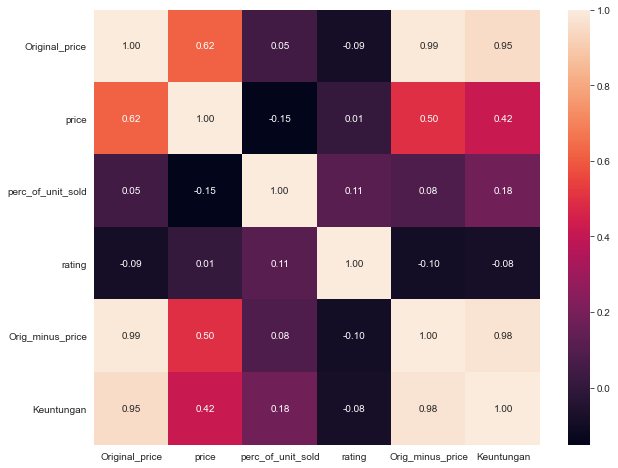

In [271]:
# Cek korelasi jika belum di drop null value
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

### Analisis berdasarkan kategori

In [279]:
df['Orig_minus_price'] = df['Original_price'] - df['price']
df['Keuntungan'] = df['Orig_minus_price'] * df['perc_of_unit_sold']
df.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender,Orig_minus_price,Brand,Keuntungan
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.000000,FREE Shipping,men,87.52,nike,8226.88
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.000000,FREE Shipping,men,59.01,nike,4720.80
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,87.807963,FREE Shipping,women,81.52,nike,6277.04
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.000000,FREE Shipping,men,107.52,nike,8171.52
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,87.807963,Eligible for FREE Shipping,men,64.01,adidas,6016.94


In [288]:
df['Brand'] = df['product'].apply(lambda x: x.lower().split()[0])
df.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender,Orig_minus_price,Brand,Keuntungan
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.000000,FREE Shipping,men,87.52,nike,8226.88
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.000000,FREE Shipping,men,59.01,nike,4720.80
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,87.807963,FREE Shipping,women,81.52,nike,6277.04
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.000000,FREE Shipping,men,107.52,nike,8171.52
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,87.807963,Eligible for FREE Shipping,men,64.01,adidas,6016.94


In [280]:
df.describe()

,Original_price,price,perc_of_unit_sold,rating,Orig_minus_price,Keuntungan
count,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,806.872140,330.354815,57.846227,88.031309,476.517325,3.025066e+04
std,1488.676764,250.263948,23.834770,9.254845,1348.545134,1.259670e+05
min,42.000000,21.400000,2.000000,20.000000,-540.490000,-3.117447e+04
25%,282.500000,145.980000,42.000000,86.000000,108.020000,5.504140e+03
50%,499.000000,268.745000,57.678161,87.807963,223.020000,1.120610e+04
75%,943.250000,442.480000,76.000000,92.000000,475.520000,2.416066e+04
max,29970.000000,2115.490000,99.000000,100.000000,27854.510000,2.729742e+06


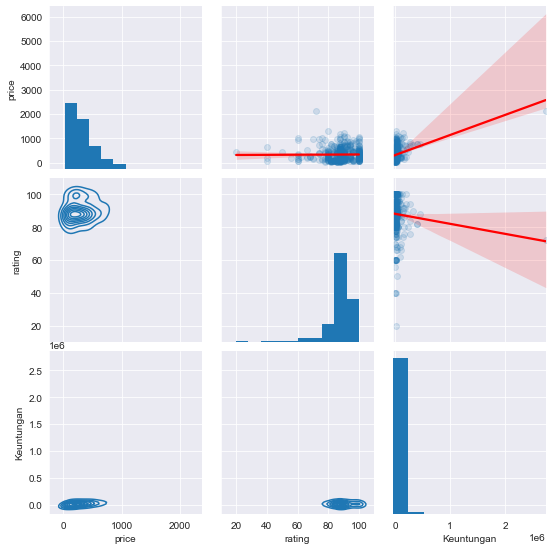

In [281]:
g = sns.PairGrid(df[['price', 'rating', 'Keuntungan']])
g = g.map_upper(sns.regplot, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g = g.map_diag(plt.hist)
g = g.map_lower(sns.kdeplot, colors="C0")

- Fitur rating dan keuntungan membentuk garis yang berbalik, yang artinya semakin besar rating, semakin kecil keuntungan yang diperoleh perusahaan

In [335]:
dt_temp_1 = df.pivot_table(index='category', values='perc_of_unit_sold', aggfunc=['sum', 'count', 'mean', 'median']).sort_values(by=('sum', 'perc_of_unit_sold'), ascending=False)
dt_temp_1


,sum,count,mean,median
,perc_of_unit_sold,perc_of_unit_sold,perc_of_unit_sold,perc_of_unit_sold
category,,,,
Watches,8509.068966,140,60.779064,61.500000
Eyewear,6958.563218,140,49.704023,55.000000
Athletic Shoes,5811.816092,93,62.492646,60.000000
Perfumes & Fragrances,4616.000000,62,74.451613,77.000000
Casual & Dress Shoes,2513.137931,47,53.471020,57.678161
Sportswear,1568.390805,30,52.279693,57.678161
Wallets,1375.678161,30,45.855939,47.000000


In [337]:
# df

- Category memiliki persentasi unit terjual paling banyak adalah category: Watches dan Eyewear dan ketiga: Athletic Shoes
- Category memiliki persentasi unit terjual paling sedikit adalah category: Perfumes & Fragrances, Casual & Dress Shoes, Wallets, Sportswear

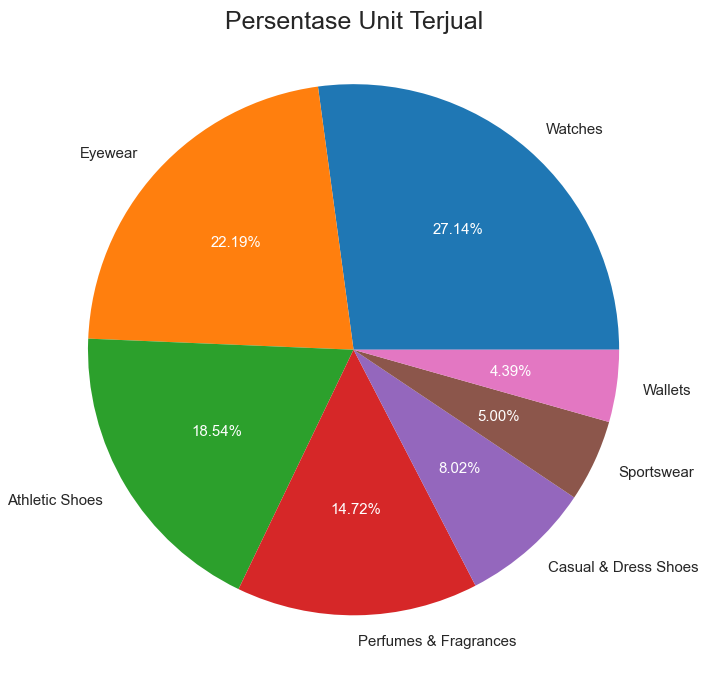

In [342]:
data_perc_of_unit_sold = dt_temp_1[('sum', 'perc_of_unit_sold')]
data_category = dt_temp_1.index

plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(data_perc_of_unit_sold , labels=data_category, autopct='%1.2f%%', textprops={'fontsize':15})
for autotext in autotexts:
    autotext.set_color('white')
plt.suptitle('Persentase Unit Terjual', fontsize=25)
plt.rcParams['patch.linewidth'] = 0 
# plt.rcParams['patch.edgecolor'] = 'black' 
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.savefig('1_.png')
plt.show()

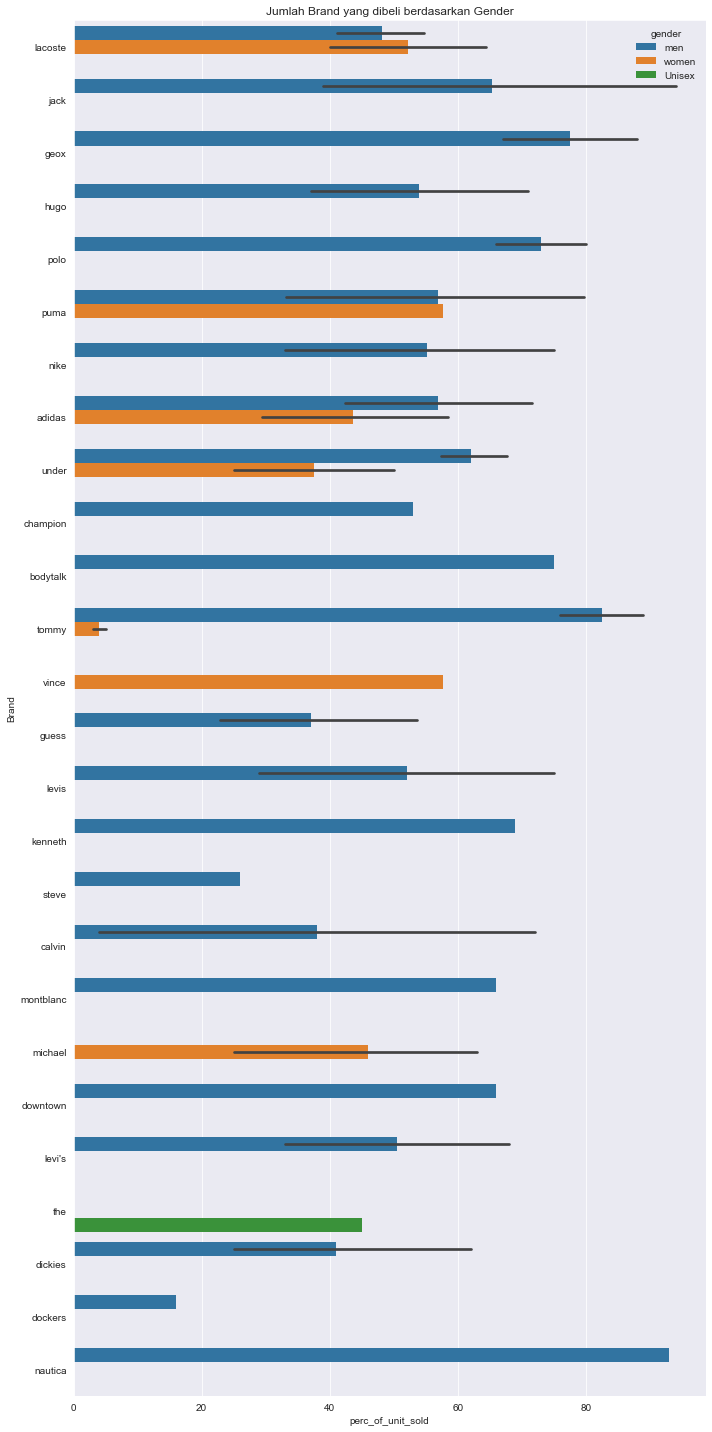

In [358]:
dt_temp_2 = df[(df['category'] == 'Wallets') | (df['category'] == 'Sportswear') | (df['category'] == 'Casual & Dress Shoes')]
# dt_temp_2.pivot_table(index=['category', 'Brand'], values='gender', aggfunc='count')
dt_temp_2 
plt.figure(figsize=(10, 20))
# ax = sns.countplot(y="Brand", hue='gender', data=dt_temp_2)
ax = sns.barplot(x="perc_of_unit_sold", y="Brand", hue="gender",
                 data=dt_temp_2)
# ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title('Jumlah Brand yang dibeli berdasarkan Gender')
# plt.ylabel(fontsize=20)
plt.tight_layout()
plt.savefig('2_.png')


In [361]:
dt_temp_3 = df.pivot_table(index='category', values='Keuntungan', aggfunc=['sum', 'count', 'mean', 'median'])
dt_temp_3[('sum', 'Keuntungan')]

category
Athletic Shoes           7.703668e+05
Casual & Dress Shoes     4.231424e+05
Eyewear                  2.890442e+06
Perfumes & Fragrances    8.473583e+05
Sportswear               1.438387e+05
Wallets                  1.663315e+05
Watches                  1.115438e+07
Name: (sum, Keuntungan), dtype: float64

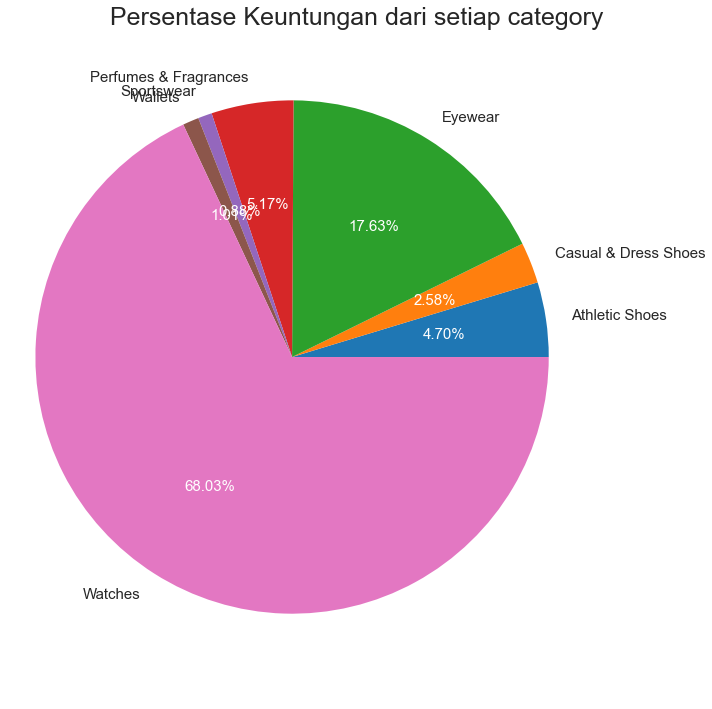

In [344]:
data_keuntungan = dt_temp_3[('sum', 'Keuntungan')]
data_category = dt_temp_3.index

plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(data_keuntungan  , labels=data_category, autopct='%1.2f%%', textprops={'fontsize':15})
for autotext in autotexts:
    autotext.set_color('white')
plt.suptitle('Persentase Keuntungan dari setiap category', fontsize=25)
plt.rcParams['patch.linewidth'] = 0 
# plt.rcParams['patch.edgecolor'] = 'black' 
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.savefig('3_.png')
plt.show()

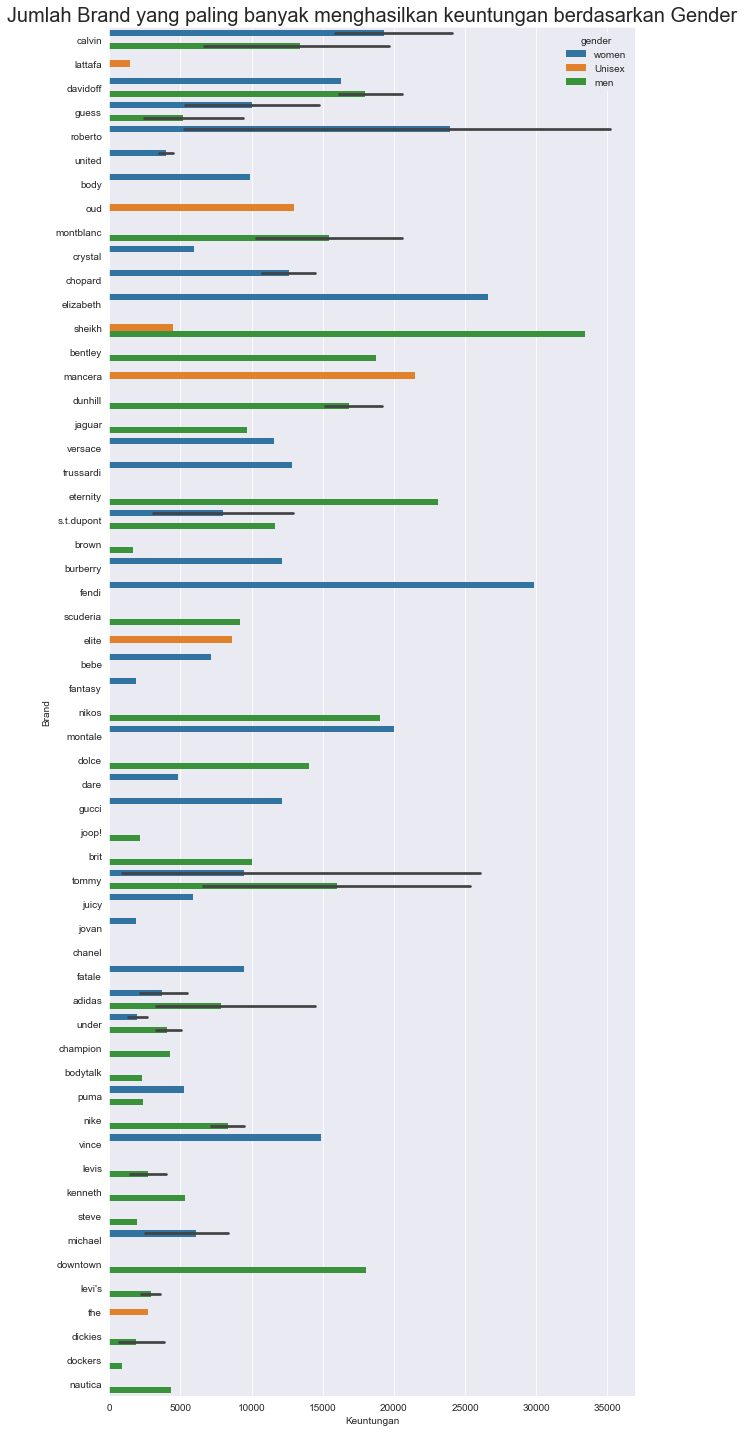

In [359]:
dt_temp_4 = df[(df['category'] == 'Wallets') | (df['category'] == 'Sportswear') | (df['category'] == 'Perfumes & Fragrances')]
# dt_temp_2.pivot_table(index=['category', 'Brand'], values='gender', aggfunc='count')
dt_temp_4 
plt.figure(figsize=(10, 20))
# ax = sns.countplot(y="Brand", hue='gender', data=dt_temp_4)
ax = sns.barplot(x="Keuntungan", y="Brand", hue="gender",
                 data=dt_temp_4)
plt.title('Jumlah Brand yang paling banyak menghasilkan keuntungan berdasarkan Gender', fontsize=20)

plt.tight_layout()
plt.savefig('4_.png')

In [362]:
df.columns

Index(['category', 'product', 'Original_price', 'price', 'perc_of_unit_sold',
       'rating', 'shpping_rate', 'gender', 'Orig_minus_price', 'Brand',
       'Keuntungan'],
      dtype='object')

### Mencari hubungan Rating

<Figure size 720x576 with 0 Axes>

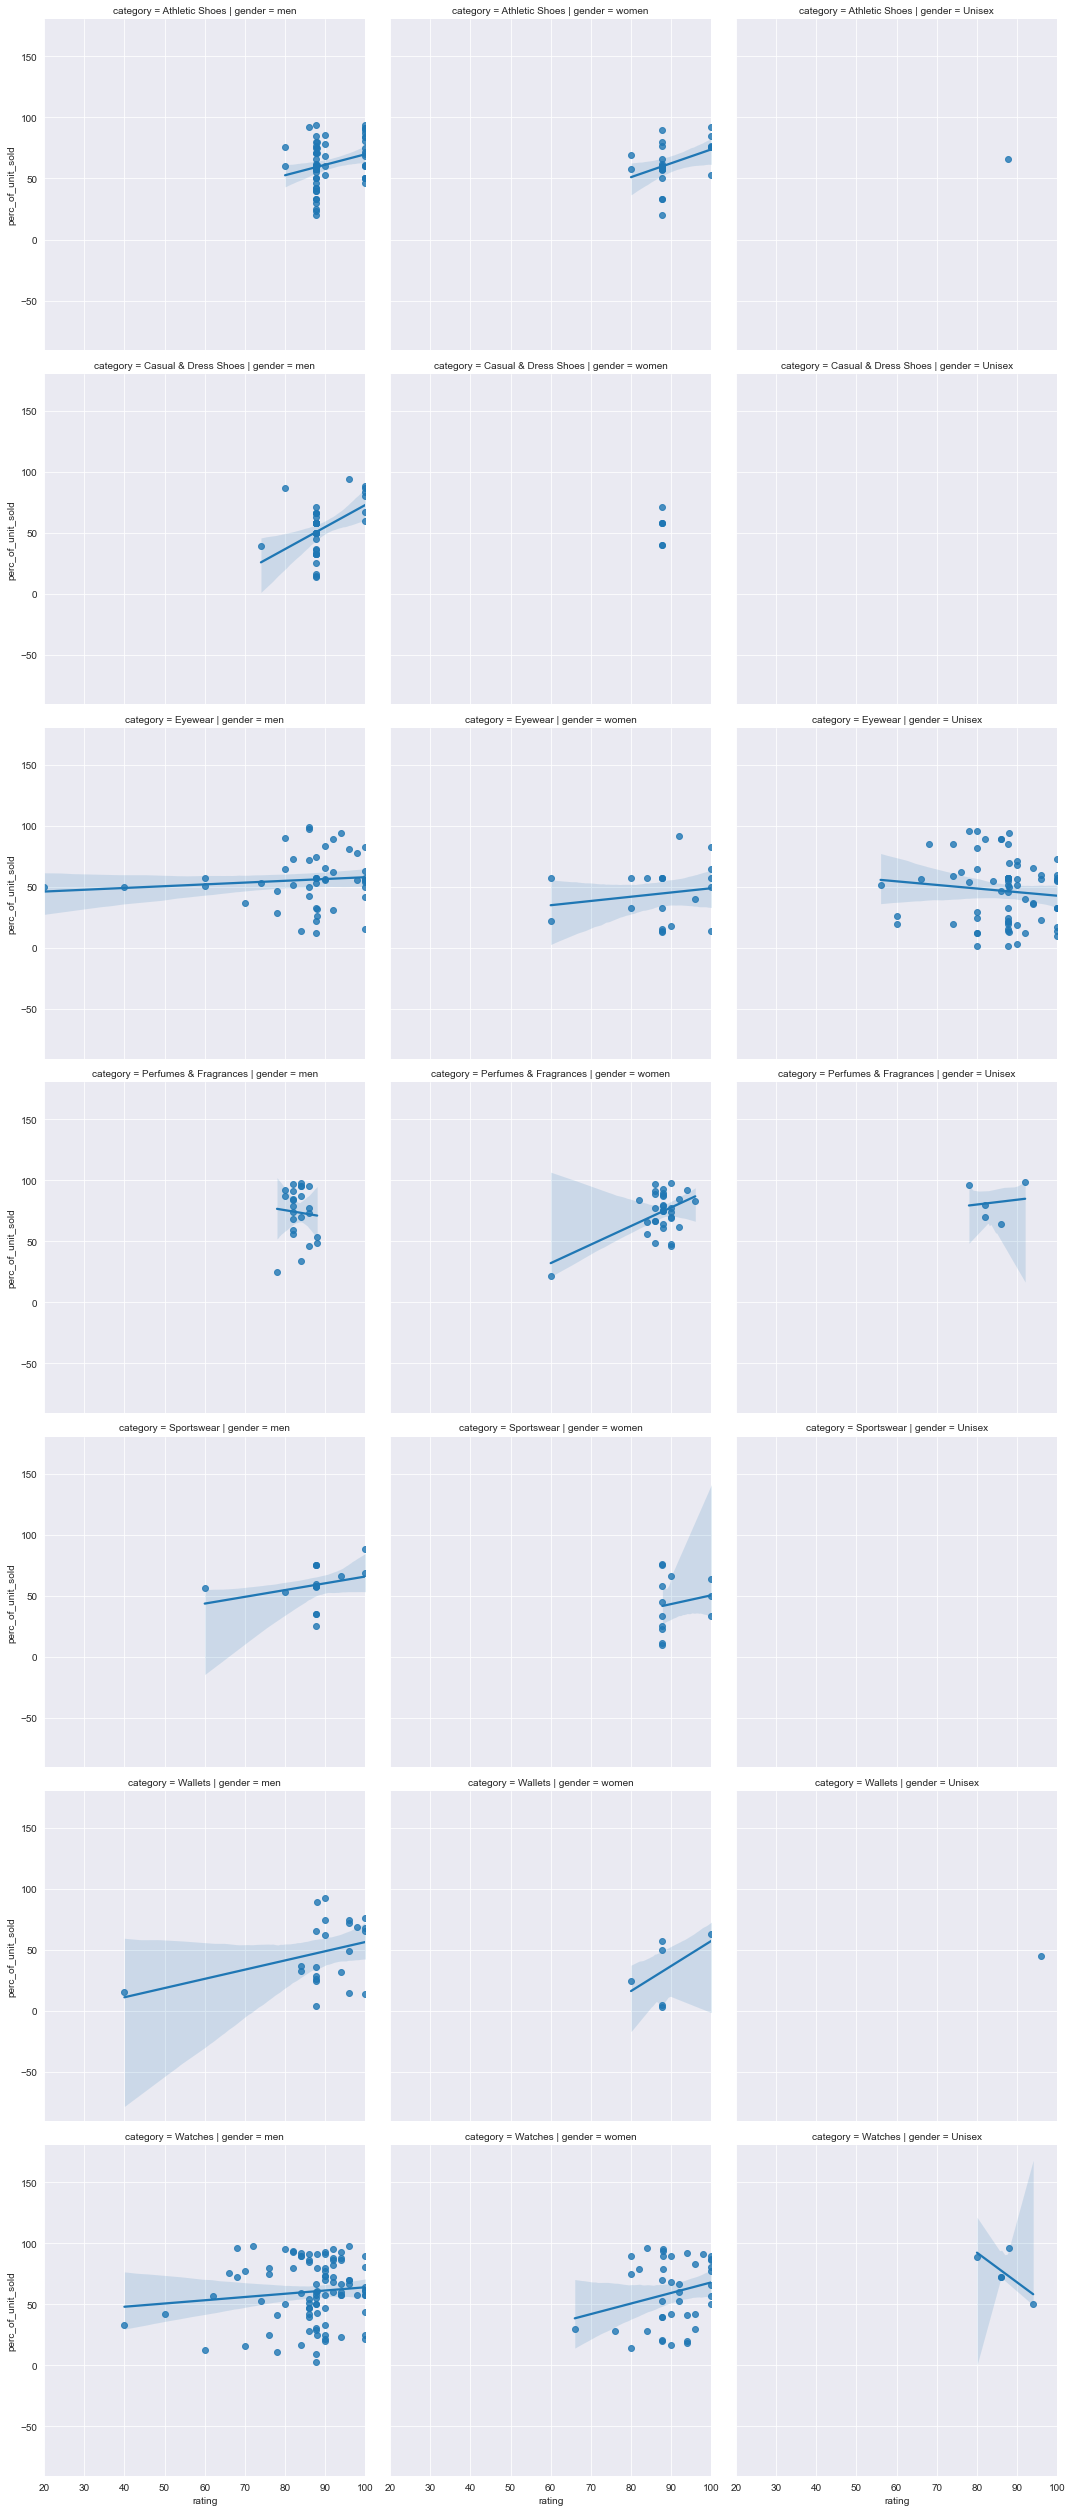

In [366]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='rating', y='perc_of_unit_sold', col='gender', row='category', data=df)
plt.tight_layout()
plt.savefig('5_.png')
plt.show()

Untuk gender Pria:
    - Athletic Shoes: semakin besar unit yang dibeli semakin besar ratingnya
    - Casual & Dress Shoes: semakin besar unit yang dibeli semakin besar ratingnya
    - Eyewear: semakin besar unit yang dibeli semakin besar ratingnya tapi tidak signifikan
    - Perfumes & Fragrances: semakin kecil unit yang dibeli semakin besar ratingnya
    - Sportswear: semakin besar unit yang dibeli semakin besar ratingnya
    - Wallets: semakin besar unit yang dibeli semakin besar ratingnya
    - Watches: semakin besar unit yang dibeli semakin besar ratingnya
        
Untuk gender Wanita:
    - Athletic Shoes: semakin besar unit yang dibeli semakin besar ratingnya
    - Casual & Dress Shoes: Tidak signifikan
    - Eyewear: semakin besar unit yang dibeli semakin besar ratingnya tapi tidak signifikan
    - Perfumes & Fragrances: semakin besar unit yang dibeli semakin besar ratingnya
    - Sportswear: semakin besar unit yang dibeli semakin besar ratingnya
    - Wallets: semakin besar unit yang dibeli semakin besar ratingnya
    - Watches: semakin besar unit yang dibeli semakin besar ratingnya

<Figure size 720x576 with 0 Axes>

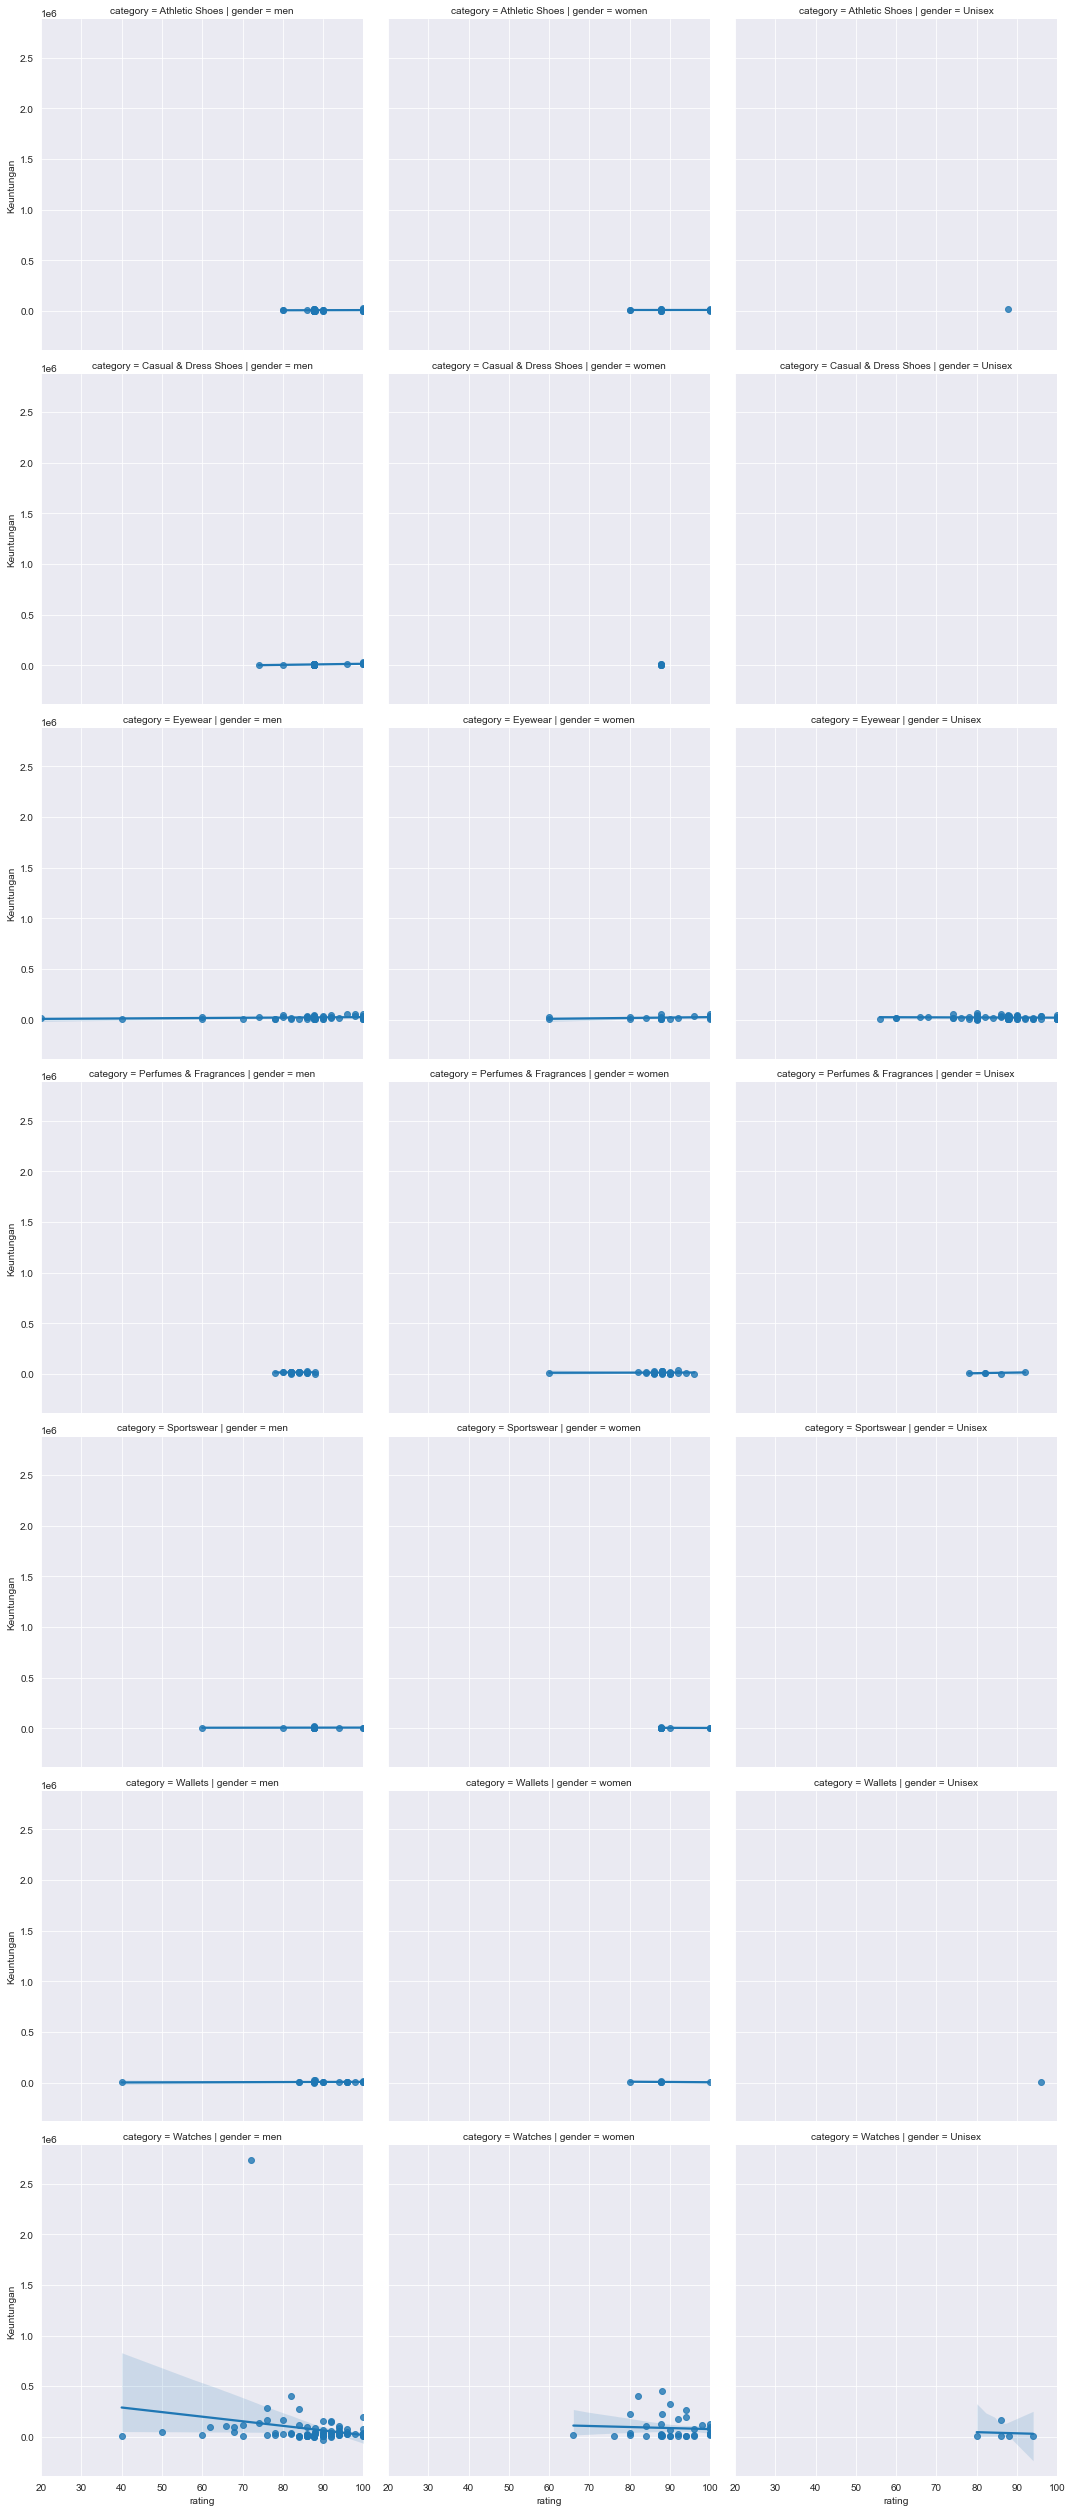

In [367]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='rating', y='Keuntungan', col='gender', row='category', data=df)
plt.tight_layout()
plt.savefig('6_.png')
plt.show()

Untuk gender Pria:
- Semua category tidak memiliki korelasi signifikan, kecuali untuk category Watches: Semakin banyak keuntungan yang dimiliki perusahaan semakin kecil ratingnya

Untuk gender Wanita:
- Semua category tidak memiliki korelasi signifikan, kecuali untuk category Watches: Semakin banyak keuntungan yang dimiliki perusahaan semakin kecil ratingnya

In [285]:
df.pivot_table(index='category', values='Original_price', aggfunc=['sum', 'min', 'max', 'median', 'mean'])

,sum,min,max,median,mean
,Original_price,Original_price,Original_price,Original_price,Original_price
category,,,,,
Athletic Shoes,36663.0,209.0,839.0,349.0,394.225806
Casual & Dress Shoes,21210.0,139.0,759.0,469.0,451.276596
Eyewear,111643.3,200.0,2094.0,820.0,797.452143
Perfumes & Fragrances,17071.0,42.0,525.0,280.5,275.338710
Sportswear,6030.0,69.0,499.0,155.0,201.000000
Wallets,7323.0,60.0,850.0,160.0,244.100000
Watches,237384.4,114.0,29970.0,1121.5,1695.602857


In [286]:
df.pivot_table(index='category', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean'])

,sum,min,max,median,mean
,price,price,price,price,price
category,,,,,
Athletic Shoes,24023.50,139.00,629.99,234.990,258.317204
Casual & Dress Shoes,13130.82,90.49,553.98,270.480,279.379149
Eyewear,52827.70,78.49,1175.99,385.490,377.340714
Perfumes & Fragrances,5710.47,21.40,318.99,84.285,92.104355
Sportswear,3093.02,38.48,281.48,82.985,103.100667
Wallets,3637.25,30.00,538.00,77.990,121.241667
Watches,76629.55,61.49,2115.49,550.235,547.353929


In [287]:
df.pivot_table(index=['category', 'product'], values='Orig_minus_price', aggfunc=['sum', 'min', 'max', 'median', 'mean'])

sum  \
                                                                         Orig_minus_price   
category              product                                                               
Athletic Shoes        Adidas Asweerun Running Shoes For Men - Core Black            60.01   
                      Adidas Courtsmash Perforated Genuine Leather Me...            64.01   
                      Adidas Duramo 9 Nylon Mesh Rubber-Accent Side-S...            55.02   
                      Adidas Duramo 9 Running Shoes For Men - Core Black            85.02   
                      Adidas Grand Court Base Faux Leather Contrast S...            71.01   
                      Adidas Grand Court Base Faux Leather Contrast S...            66.01   
                      Adidas Lite Racer RBN Nylon Mesh Side Stripe Ru...           245.02   
                      Adidas Sooraj Color Block Rubber Sole Lace-Up R...           284.01   
                      Adidas VS Pace Nubuck Contrast Side Stripe Spor...            72.02   
                      Asics Curreo II Sneakers for Men, Grey, 44 EU                110.00   
                      Asics GEL-Kayano 26 Running Shoes for Women, Mu...           209.01   
                      Asics GEL-Lyte V Sanze Sneakers for Unisex, San...           235.01   
                      Asics GEL-NIMBUS 22 Running Shoes for Women, Ro...           209.01   
                      Asics GEL-Nimbus 20 Sneaker for Men, Grey, 36 EU             389.02   
                      Asics GEL-Nimbus 20 Sneaker for Women, Multi Co...           389.02   
                      Asics Gel Kayano 25 SP Sneaker for Women, Black...           389.51   
                      Asics Gel-Kayano 5 OG Sneakers for Men, White, ...           220.00   
                      Asics Gel-Kayano 5 OG Sneakers for Men, White, ...           220.00   
                      Asics Gel-Kayano 5.1 Sneakers for Men, Black, 4...           170.00   
                      Asics Gel-Kayano 5.1 Sneakers for Men, White, 4...           170.00   
                      Asics Gel-Lyte Runner Sneakers for Men, Multico...           140.00   
                      Asics Gel-Nimbus 21 Sp Sneaker for Women Multi ...           220.00   
                      Asics Gel-Pulse 10 Sneakers for Men, Silver, 42...           180.00   
                      Asics Gel-Quantum 90 Sneakers for Men, Multicol...           180.00   
                      Asics Gel-Quantum Infinity Sneakers for Men, Bl...           330.00   
                      Asics Gel-Saga SOU Sneakers for Men, White, 42....           150.00   
                      Asics Gel-Saga SOU Sneakers for Women, White, 3...           150.00   
                      Asics Gel-Saga Sneakers for Women, White, 38 EU              170.00   
                      Asics Jolt 2 Sneaker for Men Black 43.5 EU                    70.00   
                      Asics New York Sneakers for Women, Grey, 39 EU               140.00   
                      Ellesse Classic Shoe For Women (Black - 39 EU)               134.02   
                      Ellesse Pamplona Shoe For Women (Black - 38 EU)              136.52   
                      Ellesse Pamplona Shoe For Women (Black - 39 EU)              136.52   
                      Ellesse Smash Shoe For Men (White - 43 EU)                   136.52   
                      NiKE Tanjun Sneaker for Women, Grey - 38 EU                  133.35   
                      Nike Acalme Nylon-Mesh Contrast Side Logo Suede...           218.02   
                      Nike Air Zoom Pegasus 36 Running Sneakers for M...           138.01   
                      Nike Air Zoom Vomero 14 Running Sneakers for Me...           159.51   
                      Nike Court Lite 2 Sneaker for Men , Size 42 EU ...           102.01   
                      Nike Court Royale Sport Sneakers for Women - Wh...            84.01   
                      Nike Court Vision Low Faux Leather Contrast Sid...           239.

In [289]:
df.pivot_table(index=['category', 'Brand'], values='perc_of_unit_sold', aggfunc=['mean', 'median', 'sum', 'count'])


mean            median  \
                                 perc_of_unit_sold perc_of_unit_sold   
category              Brand                                            
Athletic Shoes        adidas             73.625000         76.500000   
                      asics              51.882968         57.678161   
                      ellesse            68.500000         69.000000   
                      nike               64.163723         61.000000   
                      puma               66.000000         66.000000   
                      skechers           57.811166         60.000000   
                      under              55.000000         55.000000   
                      vans               62.000000         62.000000   
Casual & Dress Shoes  geox               77.500000         77.500000   
                      hugo               54.000000         54.000000   
                      jack               65.333333         63.000000   
                      lacoste            48.669540         50.000000   
                      nike               33.000000         33.000000   
                      polo               73.000000         73.000000   
                      puma               63.542529         57.678161   
Eyewear               alexander          57.678161         57.678161   
                      arnette            44.839080         53.839080   
                      bottega            14.000000         14.000000   
                      bvlgari            57.678161         57.678161   
                      calvin             53.559387         57.678161   
                      carrera            48.083333         51.000000   
                      diesel             57.000000         57.000000   
                      emporio            51.669540         53.839080   
                      esprit             92.000000         92.000000   
                      fendi              40.000000         40.000000   
                      flamingo           55.000000         55.000000   
                      g-star             25.000000         25.000000   
                      gucci              23.000000         23.000000   
                      guess              49.500000         49.500000   
                      just               57.678161         57.678161   
                      lacoste            53.000000         53.000000   
                      marc               57.678161         57.678161   
                      miu                50.000000         50.000000   
                      oakley             36.839080         36.839080   
                      polaroid           51.400000         52.000000   
                      puma               37.000000         37.000000   
                      ray                52.723180         54.500000   
                      ray-ban            48.680460         57.000000   
                      salvatore          57.678161         57.678161   
                      sunglasses         59.000000         59.000000   
                      tom                56.000000         56.000000   
                      u.s.               84.000000         84.000000   
                      vogue              57.678161         57.678161   
Perfumes & Fragrances bebe               75.000000         75.000000   
                      bentley            92.000000         92.000000   
                      body               74.000000         74.000000   
                      brit               34.000000         34.000000   
                      brown              59.000000         59.000000   
                      burberry           98.000000         98.000000   
                      calvin             84.857143         84.000000   
                      chanel             83.000000         83.000000   
                      chopard            77.500000         77.500000   
                      crystal            46.000000         46.000000   
              

In [290]:
df.pivot_table(index=['category'], values='Keuntungan', aggfunc=['sum', 'mean', 'median', 'count']).sort_values(by=('sum', 'Keuntungan'))

,sum,mean,median,count
,Keuntungan,Keuntungan,Keuntungan,Keuntungan
category,,,,
Sportswear,1.438387e+05,4794.624042,3351.945,30
Wallets,1.663315e+05,5544.383851,3163.475,30
Casual & Dress Shoes,4.231424e+05,9003.030152,7620.400,47
Athletic Shoes,7.703668e+05,8283.514504,6660.900,93
Perfumes & Fragrances,8.473583e+05,13667.068871,12932.960,62
Eyewear,2.890442e+06,20646.014831,16080.130,140
Watches,1.115438e+07,79674.142462,26523.915,140


### Kesimpulan

1) Boosting jumlah unit produk terjual dengan cara meningkatkan promosi 
                        terhadap produk yang paling banyak diminati berfokus kepada Gender.
                        Brand yang disebutkan memiliki potensi unit produk yang dibeli akan lebih meningkat.

a) Dari keempat Brand tersebut, walaupun unit yang terbeli sedikit namun gender Pria masih memiliki 
                        ketertarikan terutama pada Geox, Montblanc, Downtown, dan Tommy. Oleh karena itu, promosi Brand ini dapat
                        ditingkatkan agar pembeli Pria semakin banyak membeli barang tersebut, sehingga dapat meningkatkan unit penjualan.
                    </p>
                    <p>
                        2) Dari keempat Brand tersebut, walaupun unit yang terbeli sedikit namun gender Wanita masih memiliki 
                        ketertarikan terutama pada Brand Vince, Lacoste, Michael dan Pumma. Oleh karena itu, promosi Brand ini dapat
                        ditingkatkan agar pembeli Wanita semakin banyak membeli barang tersebut, sehingga dapat meningkatkan unit penjualan.

Kesimpulan:
Boosting jumlah keuntungan produk terjual dengan cara meningkatkan promosi terhadap produk yang paling banyak diminati berfokus kepada Gender. Brand yang disebutkan memiliki potensi unit produk yang dibeli akan lebih meningkat.

1) Dari keempat Brand tersebut, walaupun unit yang terbeli sedikit namun gender Pria masih memiliki ketertarikan terutama pada produk tersebut. Oleh karena itu, promosi Brand ini dapat ditingkatkan agar pembeli Pria semakin banyak membeli barang tersebut, sehingga dapat meningkatkan keuntungan penjualan.

2) Dari keempat Brand tersebut, walaupun unit yang terbeli sedikit namun gender Wanita masih memiliki ketertarikan terutama pada produk tersebut. Oleh karena itu, promosi Brand ini dapat ditingkatkan agar pembeli Wanita semakin banyak membeli barang tersebut, sehingga dapat meningkatkan keuntungan penjualan.

Boosting jumlah keuntungan produk terjual dengan cara meningkatkan promosi terhadap produk yang paling banyak diminati berfokus kepada Gender. Brand yang disebutkan memiliki potensi unit produk yang dibeli akan lebih meningkat.

1) Dari keempat Brand tersebut, walaupun unit yang terbeli sedikit namun gender Pria masih memiliki ketertarikan terutama pada produk tersebut. Oleh karena itu, promosi Brand ini dapat ditingkatkan agar pembeli Pria semakin banyak membeli barang tersebut, sehingga dapat meningkatkan keuntungan penjualan.

2) Dari keempat Brand tersebut, walaupun unit yang terbeli sedikit namun gender Wanita masih memiliki ketertarikan terutama pada produk tersebut. Oleh karena itu, promosi Brand ini dapat ditingkatkan agar pembeli Wanita semakin banyak membeli barang tersebut, sehingga dapat meningkatkan keuntungan penjualan.